<a href="https://colab.research.google.com/github/sash-ko/ml-playground/blob/master/chapter-10/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.2.0', '2.3.0-tf')

### Download MNIST fashion dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Explore dataset

In [38]:
from google.colab.patches import cv2_imshow

for i in range(5):
    cv2_imshow(X_train_full[i])

In [7]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full.dtype

dtype('uint8')

### Create validation dataset

In [59]:
# Size of the validation dataset
size_valid = 5000

X_valid, X_train = X_train_full[:size_valid], X_train_full[size_valid:]
y_valid, y_train = y_train_full[:size_valid], y_train_full[size_valid:]

# scale pixel values down to 0-1 range so Gradient descent can converge faster
X_valid = X_valid / 255.
X_train = X_train / 255.
X_test = X_test / 255.

In [20]:
# all labes in the dataset are presented as numbers
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

### Create model

In [39]:
# version 1

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# version 2

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [43]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [45]:
model.get_layer("dense_3") is hidden1

True

In [46]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02026461,  0.03311162, -0.0526504 , ..., -0.04211367,
         0.0248972 ,  0.04219057],
       [ 0.01268012, -0.02624216, -0.00301114, ..., -0.07323937,
         0.00147792, -0.07073352],
       [ 0.00987158,  0.07324821,  0.05345051, ...,  0.05658369,
        -0.00858071, -0.07016762],
       ...,
       [ 0.07334094, -0.01442678,  0.00944763, ..., -0.02210499,
        -0.00030995,  0.05690539],
       [ 0.05492966,  0.0698076 , -0.04102115, ...,  0.04184826,
        -0.06852381,  0.04101093],
       [ 0.02364112,  0.04121495, -0.04623459, ..., -0.00042525,
         0.07150161,  0.07298817]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
biases.shape

(300,)

In [53]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(lr=0.01),
    metrics=["accuracy"]
)

### Train model

In [54]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7392 - accuracy: 0.7586 - val_loss: 0.5130 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4944 - accuracy: 0.8279 - val_loss: 0.4569 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4458 - accuracy: 0.8445 - val_loss: 0.4216 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4180 - accuracy: 0.8538 - val_loss: 0.4128 - val_accuracy: 0.8530
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3983 - accuracy: 0.8592 - val_loss: 0.3894 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3817 - accuracy: 0.8659 - val_loss: 0.3802 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3691 - accuracy: 0.8697 - val_loss: 0.3640 - val_accuracy:

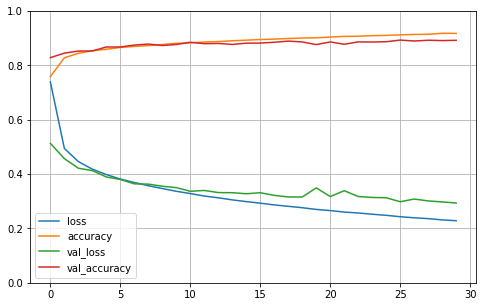

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True),
plt.gca().set_ylim(0, 1);

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8863


[0.3204803168773651, 0.8863000273704529]